# Lección 8: Regresión OLS con statsmodels y pruebas de hipótesis


En esta lección aprenderás a estimar modelos de regresión lineal clásica en Python usando `statsmodels`, interpretar los resultados y realizar pruebas de hipótesis básicas (t-test y F-test).

## Preparar entorno

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

* `statsmodels.api` (interfaz orientada a matrices)
* `statsmodels.formula.api` (fórmula estilo E con strings)

## Crear datos de ejemplo

In [5]:
np.random.seed(123)
n = 100
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(5, 2, n)
ε  = np.random.normal(0, 0.5, n)

# Genera la variable dependiente
β0, β1, β2 = 2.0, 1.5, -0.8
Y = β0 + β1 * X1 + β2 * X2 + ε

df = pd.DataFrame({"Y": Y, "X1": X1, "X2": X2})


* Simulamos un modelo con intercepto y dos regresores más ruido.

## Ajustes vía matrices (`API`)

In [10]:
# Agregar columna de constante (intercepto)
X = sm.add_constant(df[["X1", "X2"]])
model = sm.OLS(df["Y"], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1086.
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           3.94e-67
Time:                        00:42:36   Log-Likelihood:                -69.269
No. Observations:                 100   AIC:                             144.5
Df Residuals:                      97   BIC:                             152.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9250      0.135     14.270      0.0

Puntos clave del `summary()`:
* coef: estimadores de $\beta_0$, $\beta_1$, $\beta_2$
* std err: error estándar de cada coeficiente
* t: estadístico t = coef / std err
* P > |t|: p-valor para $H_0$: coef = 0
* [0.025, 0.975]: intervalo de confianza al 95%
* R-squared / Adj. R-squared: bondad de ajuste
* F-statistic y Prob (F-statistic): prueba conjunta de que todos los coeficientes (excepto el intercepto) sean cero.

## Ajuste vía fórmula (`Formula API`)

In [11]:
# Notaxión tipo R: Y ~ X1 + X2

formula_model = smf.ols("Y ~ X2 + X2", data = df)
formula_results = formula_model.fit()
print(formula_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     80.85
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           1.86e-14
Time:                        00:47:19   Log-Likelihood:                -196.82
No. Observations:                 100   AIC:                             397.6
Df Residuals:                      98   BIC:                             402.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0470      0.480      4.261      0.0

* Más legible cuando hay muchas variables o transformaciones (`np.log(X1)`)

## Pruebas de hipótesis

a. Test individual (t-test)
* Hipótesis: $H_0: \, \beta_j = 0$ vs. $H_1: \, \beta_j \neq 0$
* Se lee el $P > \vert t \vert$ en el summary. Si $p<\alpha$ (p.ej. 0.05) rechazamos $H_0$.

In [12]:
# Ejemplo: prueba manual usando results
t1, p1 = results.tvalues["X1"], results.pvalues["X1"]
print(f"t({results.df_resid:.0f}) = {t1:.3f}, p = {p1:.3f}")

t(97) = 33.861, p = 0.000


b. Test conjunto (F-test)
* Hipótesis: $H_0: \, \beta_1 = \beta_2 = \ldots = \beta_k = 0$ vs. $H_1:$ al menos uno $\neq 0$
* Se lee Prob (F-statistic)

In [17]:
f_stat, f_pval = results.fvalue, results.f_pvalue
print(f"F = {f_stat:.2f}, p = {f_pval:.3f}")

F = 1086.25, p = 0.000


## Diagnóstico básico de supuestos

1. Residuos vs. ajustados

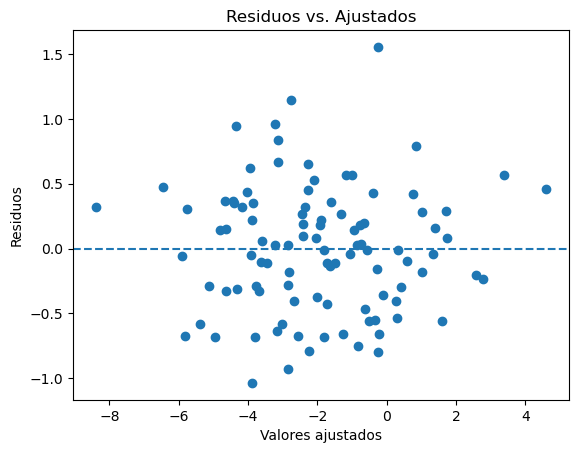

In [20]:
fitted = results.fittedvalues
resid = results.resid
import matplotlib.pyplot as plt

plt.scatter(fitted, resid)
plt.axhline(0, linestyle = "--")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs. Ajustados")
plt.show()

* Evalúa heterocedasticidad y linealidad

2. QQ-plot de residuos

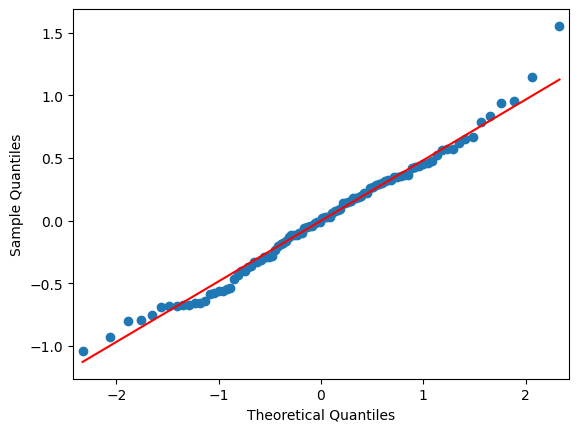

In [22]:
sm.qqplot(resid, line = "s")
plt.show()

* Verifica normalidad de errores